In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/the-data-science-union/DSU-W21-Personality/main/cleaned_youngpeople_data.csv')

In [ ]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,1,1,1,1,3,1,1,1,1,5,4,2,5,4,4,1,5,5,3,1,2,1,5,1,3,3,5,3,5,3,...,4,3,4,3,4,3,5,1,1,3,5,5,1,4,5,1,4,3,2,3,4,3,few hours a day,3,4,5,3,3,1,3,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,4,1,3,1,4,4,2,1,1,5,2,2,4,3,4,1,3,5,4,1,4,1,3,4,5,2,4,4,5,1,...,4,4,4,4,2,4,2,2,5,4,4,4,1,4,3,5,3,4,5,3,2,3,few hours a day,3,4,1,4,2,5,2,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,4,1,4,3,5,5,5,1,3,5,3,4,4,2,4,2,5,5,2,2,1,1,2,1,5,2,4,2,4,1,...,3,4,3,5,3,4,4,3,4,3,2,4,4,4,4,3,3,3,4,5,3,1,few hours a day,2,4,1,4,3,4,2,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,4,2,2,1,2,5,1,2,1,5,4,4,3,3,4,3,1,2,5,1,2,4,4,5,4,1,3,1,2,3,...,1,5,3,1,3,3,2,5,5,4,5,3,3,2,2,1,2,1,1,4,2,4,most of the day,2,4,3,3,4,4,1,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,2,5,3,2,1,2,4,2,2,5,4,4,5,2,3,3,4,4,3,1,4,3,2,3,2,2,2,2,2,3,...,4,2,3,3,3,3,5,4,2,3,5,5,2,3,5,3,3,2,4,3,3,3,few hours a day,4,3,4,3,3,2,4,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


explore relationship between phobias and demographics: focus on gender, number of siblings

In [ ]:
phobias = df[df.columns[63:73]]
phobias = phobias.join(df[df.columns[140:150]])
phobias

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1,1,1,1,1,5,3,1,3,2,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,1,1,1,2,1,1,1,3,1,4,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,1,1,1,1,1,1,1,1,1,2,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,2,1,1,3,5,5,5,4,5,5,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,1,2,1,1,1,1,2,2,4,3,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1,2,4,5,2,2,2,3,3,4,20,164,57,1,female,right handed,secondary school,no,city,house/bungalow
973,1,1,1,1,1,1,1,2,5,5,27,183,80,5,male,left handed,masters degree,no,village,house/bungalow
974,2,1,3,2,2,2,1,1,1,5,18,173,75,0,female,right handed,secondary school,yes,city,block of flats
975,2,3,2,5,3,3,3,3,5,5,25,173,58,1,female,right handed,college/bachelor degree,no,city,block of flats


In [ ]:
gengroup = phobias.groupby('Gender')
gengroup.mean().reset_index()

,Gender,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Age,Height,Weight,Number of siblings
0,female,2.179310,2.256897,2.589655,2.615517,3.256897,3.308621,2.722414,2.779310,3.277586,2.934483,20.087931,167.862069,59.062069,1.272414
1,male,1.879093,1.536524,1.760705,2.586902,2.209068,2.599496,1.964736,2.307305,2.697733,2.602015,20.869018,181.675063,77.017632,1.340050


In [ ]:
sibgroup = phobias.groupby('Number of siblings')
sibgroup.mean().reset_index()

,Number of siblings,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Age,Height,Weight
0,0,2.094937,1.981013,2.284810,2.588608,2.734177,2.867089,2.265823,2.455696,2.848101,2.708861,19.829114,173.202532,67.284810
1,1,2.059387,1.927203,2.222222,2.628352,2.925287,3.099617,2.413793,2.607280,3.049808,2.886973,20.425287,173.885057,66.342912
2,2,1.994872,2.035897,2.379487,2.594872,2.764103,2.917949,2.446154,2.661538,3.066667,2.723077,20.671795,172.897436,66.528205
3,3,2.352113,2.126761,2.267606,2.676056,2.746479,3.042254,2.690141,2.619718,3.295775,2.760563,20.492958,172.408451,63.732394
4,4,1.722222,2.000000,2.000000,2.277778,2.500000,3.388889,2.666667,2.444444,3.444444,2.277778,20.388889,172.666667,62.944444
5,5,1.222222,1.333333,1.555556,2.222222,2.333333,2.555556,2.111111,2.111111,2.888889,2.777778,22.444444,176.444444,72.666667
6,6,1.666667,1.000000,1.333333,1.666667,2.000000,2.666667,1.666667,2.000000,2.666667,1.666667,20.666667,177.000000,76.666667
7,10,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,2.000000,24.000000,168.000000,55.000000


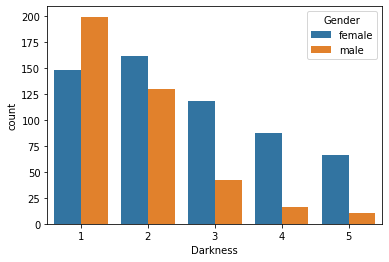

In [ ]:
sns.countplot(x='Darkness', hue= "Gender", data=phobias)

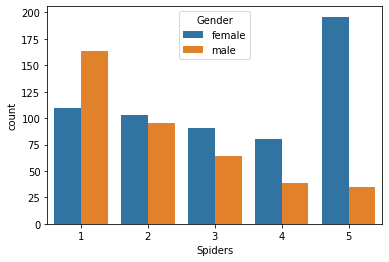

In [ ]:
sns.countplot(x='Spiders', hue = 'Gender', data=phobias)

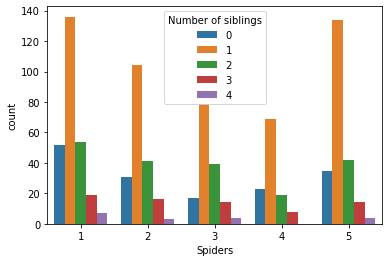

In [ ]:
sns.countplot(x='Spiders', hue = 'Number of siblings', data=phobias[phobias['Number of siblings'] < 5])

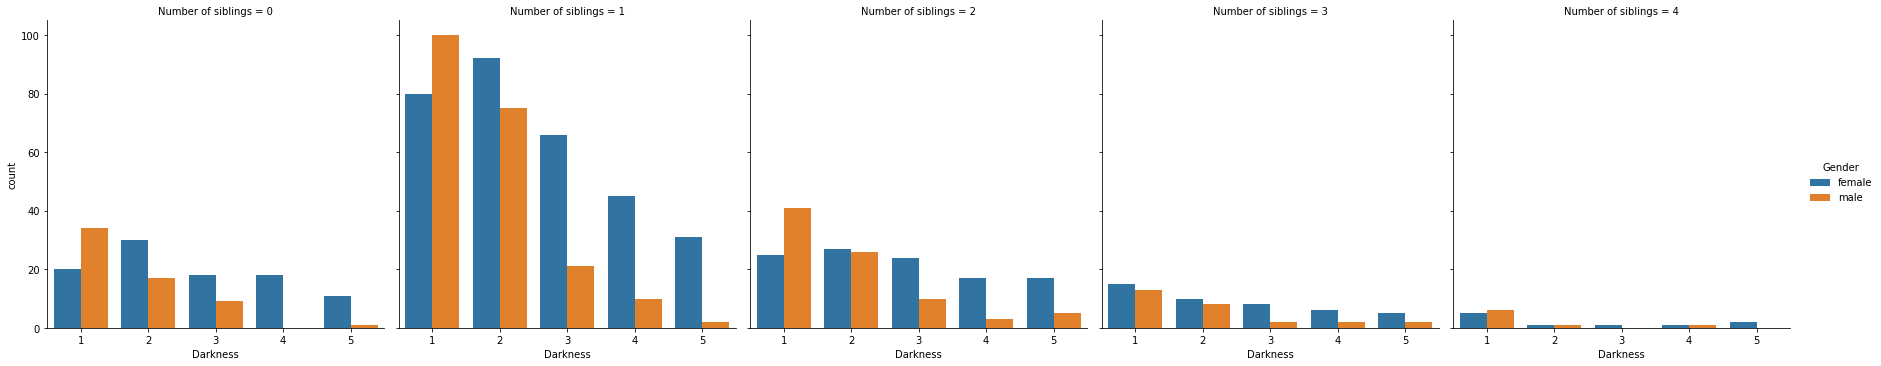

In [ ]:
g = sns.catplot(x="Darkness", hue="Gender", col="Number of siblings",
                data=phobias[phobias['Number of siblings'] < 5], kind="count");

Text(0.5, 1.0, 'Fear of Darkness vs Number of Siblings, by Gender')

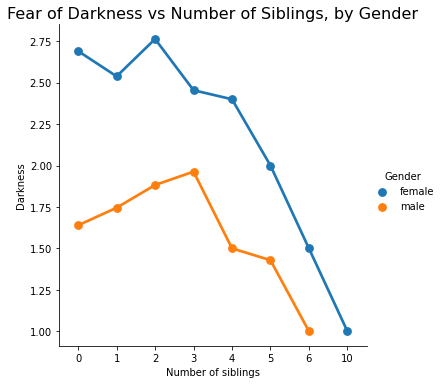

In [ ]:
sns.catplot(x = 'Number of siblings', y = 'Darkness', hue = 'Gender', kind = 'point', data = phobias, ci = None)
plt.title("Fear of Darkness vs Number of Siblings, by Gender", size=16)

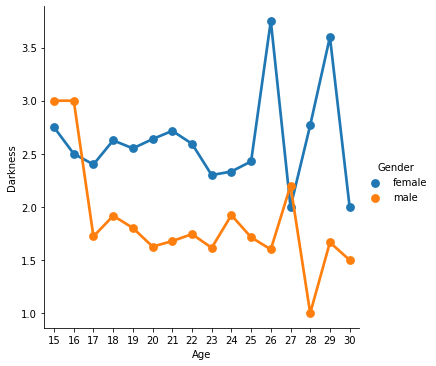

In [ ]:
sns.catplot(x = 'Age', y = 'Darkness', hue = 'Gender', kind = 'point', data = phobias, ci = None)

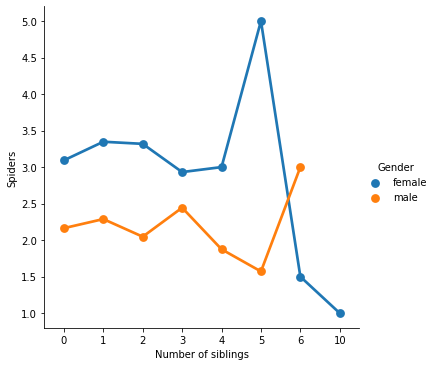

In [ ]:
sns.catplot(x = 'Number of siblings', y = 'Spiders', hue = 'Gender', kind = 'point', data = phobias, ci = None)

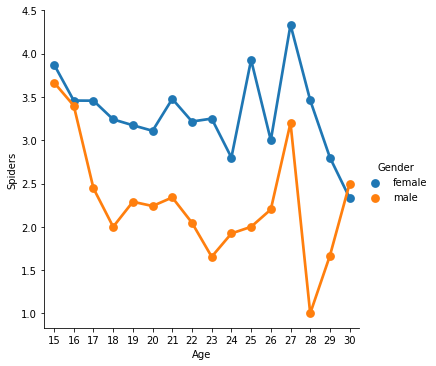

In [ ]:
sns.catplot(x = 'Age', y = 'Spiders', hue = 'Gender', kind = 'point', data = phobias, ci = None)

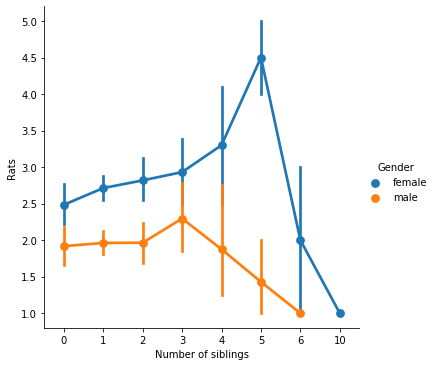

In [ ]:
sns.catplot(x = 'Number of siblings', y = 'Rats', hue = 'Gender', kind = 'point', data = phobias)

random forests

single to predict healthy lifestyle on other personality questions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
interests = df[['Healthy eating', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars',
       'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing',
       'Musical instruments', 'Writing', 'Passive sport', 'Active sport',
       'Gardening', 'Celebrities', 'Shopping', 'Science and technology',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']]
interests.head()

,Healthy eating,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,4,1,5,1,3,3,5,3,5,3,3,3,3,5,3,1,1,1,1,5,3,3,2,1,5,5,1,4,4,2,5,4,4
1,3,1,3,4,5,2,4,4,5,1,1,4,4,5,1,2,2,2,1,1,1,1,1,1,1,1,2,3,3,2,4,2,5
2,3,1,2,1,5,2,4,2,4,1,1,5,2,5,2,3,1,5,5,5,5,5,5,5,2,1,1,4,2,5,5,5,5
3,3,4,4,5,4,1,3,1,2,3,3,5,4,4,2,5,1,5,4,1,1,1,3,1,1,1,2,4,3,1,2,1,1
4,4,3,2,3,2,2,2,2,2,3,3,5,2,3,3,2,3,1,4,4,1,3,1,3,1,4,3,3,3,2,4,2,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(interests.drop(['Healthy eating'], axis='columns'),
                                                    interests['Healthy eating'], 
                                                    test_size=0.2)
model = RandomForestClassifier(oob_score=True, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.oob_score_

0.49039692701664533

In [ ]:
model.score(X_test, y_test)

0.5153061224489796

In [ ]:
y_predicted = model.predict(X_test)
confusematrix = confusion_matrix(y_test, y_predicted)

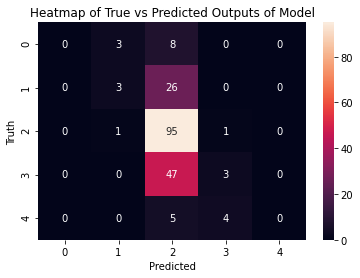

In [ ]:
sns.heatmap(confusematrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Heatmap of True vs Predicted Outputs of Model')
plt.show()

see importance of each variable to see if we can drop some to improve the model

In [ ]:
model.feature_importances_

array([0.03285912, 0.03201533, 0.0305135 , 0.03222737, 0.02681101,
       0.02550438, 0.02960744, 0.03343851, 0.03120191, 0.02933993,
       0.03181147, 0.03380471, 0.03203078, 0.02915603, 0.0296198 ,
       0.03458318, 0.03091281, 0.03243607, 0.03495868, 0.03345457,
       0.02755272, 0.02478237, 0.03471128, 0.03941152, 0.02739678,
       0.03100769, 0.03691766, 0.03208926, 0.03204004, 0.02068576,
       0.03388944, 0.03322887])

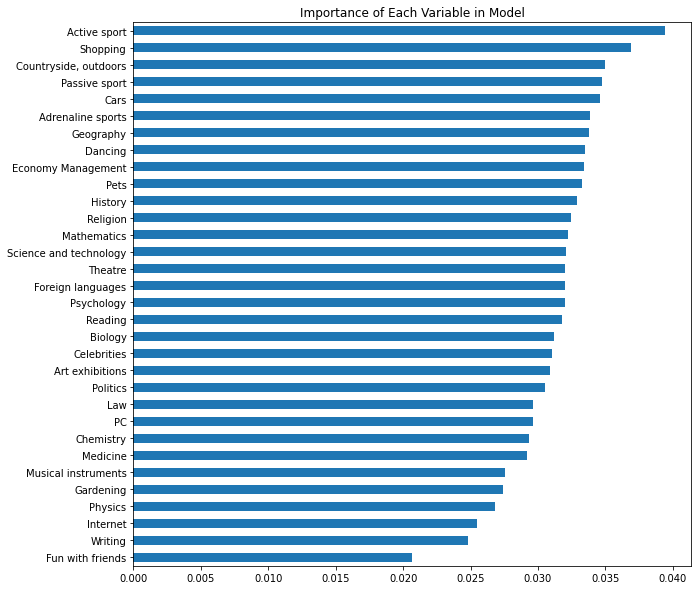

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,10))
plt.title('Importance of Each Variable in Model')
plt.show()

In [ ]:
interests2 = interests.drop(columns = ['Fun with friends', 'Writing', 'Internet', 'Physics', 'Gardening', 'Musical instruments', 'Medicine', 'Chemistry', 'PC', 'Law'])
X_train, X_test, y_train, y_test = train_test_split(interests.drop(['Healthy eating'], axis='columns'),
                                                    interests['Healthy eating'], 
                                                    test_size=0.2)
model = RandomForestClassifier(oob_score=True, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.oob_score_

0.48655569782330343

In [ ]:
model.score(X_test, y_test)

0.5255102040816326

hyper parameter tuning

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
oob_score=[True]
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 'log2', 0.9, 0.2]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]
warm_start = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'warm_start': warm_start,
               'oob_score': oob_score}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2', 0.9, 0.2],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000],
 'oob_score': [True],
 'warm_start': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
hyperparametermodel = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = hyperparametermodel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.9,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 472,
 'oob_score': True,
 'warm_start': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.7449 degrees.
Accuracy = 65.26%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.5612 degrees.
Accuracy = 71.48%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 9.52%.


In [ ]:
y_predicted = best_random.predict(X_test)

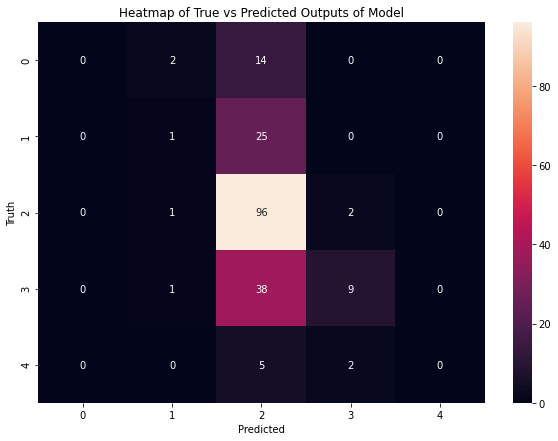

In [ ]:
confusematrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(confusematrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Heatmap of True vs Predicted Outputs of Model')
plt.show()